In [1]:
import torch
from dpm.models import BernoulliNaiveBayes
from dpm.visualize import plot_stats
import numpy as np

In [2]:
y = torch.cat((torch.zeros(1000), torch.ones(2000))).view(-1, 1).float()
y.shape

torch.Size([3000, 1])

In [3]:
np.random.binomial(size=(3, 3), n=1, p=0.6)

array([[0, 0, 1],
       [0, 1, 1],
       [1, 1, 1]])

In [4]:
x = torch.cat((torch.tensor(np.random.binomial(size=(1000, 10), n=1, p=0.7)), 
               torch.tensor(np.random.binomial(size=(2000, 10), n=1, p=0.2))), dim=0).float()
x.shape

torch.Size([3000, 10])

In [5]:
model = BernoulliNaiveBayes()

tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)

tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)

tensor(0, dtype=torch.uint8)
tensor(0, dtype=torch.uint8)



In [6]:
model.log_prob(x, y)

tensor([-13.2231, -12.8972, -15.1953,  ..., -13.7672,  -7.6845, -13.6113],
       grad_fn=<SumBackward2>)

In [7]:
model.y_dist.probs

tensor([0.4564], grad_fn=<ExpBackward>)

In [8]:
stats = model.fit(x, y)

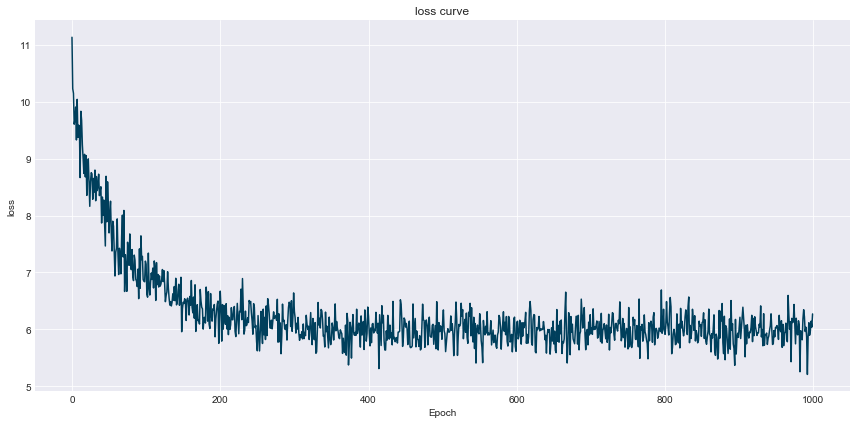

In [9]:
plot_stats(stats)

In [10]:
model.y_dist.probs

tensor([0.6555], grad_fn=<ExpBackward>)

In [11]:
(model.predict(x) == y.long()).float().mean()

tensor(0.9603)

In [12]:
model.x_dist[0].probs

tensor([0.7158, 0.6995, 0.7071, 0.7074, 0.6877, 0.6857, 0.7022, 0.6780, 0.6928,
        0.6780], grad_fn=<ExpBackward>)

In [13]:
model.x_dist[1].probs

tensor([0.2054, 0.1884, 0.1964, 0.2098, 0.1910, 0.2149, 0.1825, 0.1804, 0.2090,
        0.1892], grad_fn=<ExpBackward>)

In [14]:
X = model.sample(5)
print(X)
print(X.mean(dim=1))

tensor([[1., 0., 1., 0., 0., 0., 0., 1., 1., 1.],
        [1., 0., 1., 1., 0., 1., 1., 1., 0., 1.],
        [0., 0., 1., 0., 1., 1., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 1., 1., 1., 1., 1.]], grad_fn=<IndexBackward>)
tensor([0.5000, 0.7000, 0.6000, 0.0000, 0.7000], grad_fn=<MeanBackward0>)


In [15]:
model.predict(X)

tensor([[0],
        [0],
        [0],
        [1],
        [0]])

In [16]:
x_s, y_s = model.sample(5, return_y=True)
x_s.shape, y_s.shape

(torch.Size([5, 10]), torch.Size([5, 1]))

In [17]:
(model.predict(x_s) == y_s).float().mean()

tensor(1.)